### EDA

In [2]:
import pandas as pd
import numpy  as np
import matplotlib
from matplotlib import pylab as plt

In [14]:
df = pd.read_csv('Suicide Rate Preprocessed.csv')

Correlation Matrix

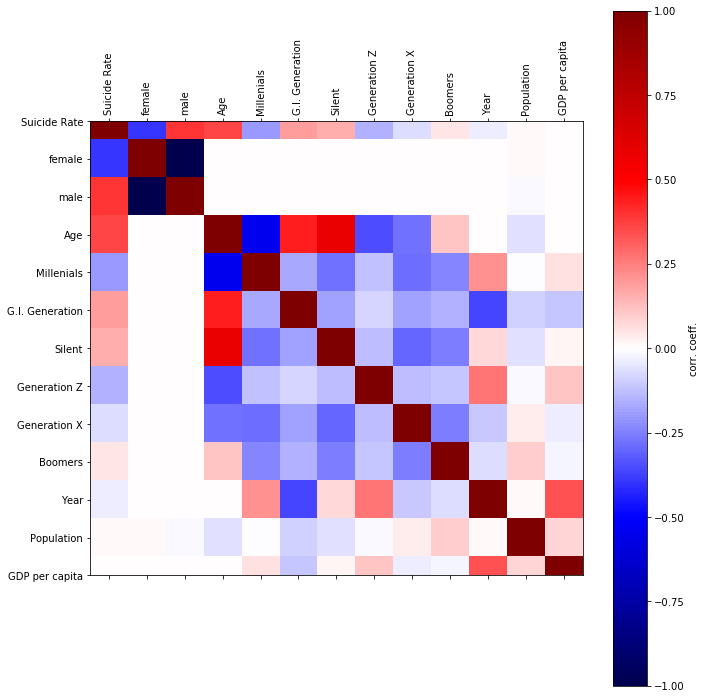

In [5]:
corrmat = df.iloc[:,101:].corr()

all_cols = np.abs(corrmat).sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
#plt.savefig('',dpi=300)
plt.show()

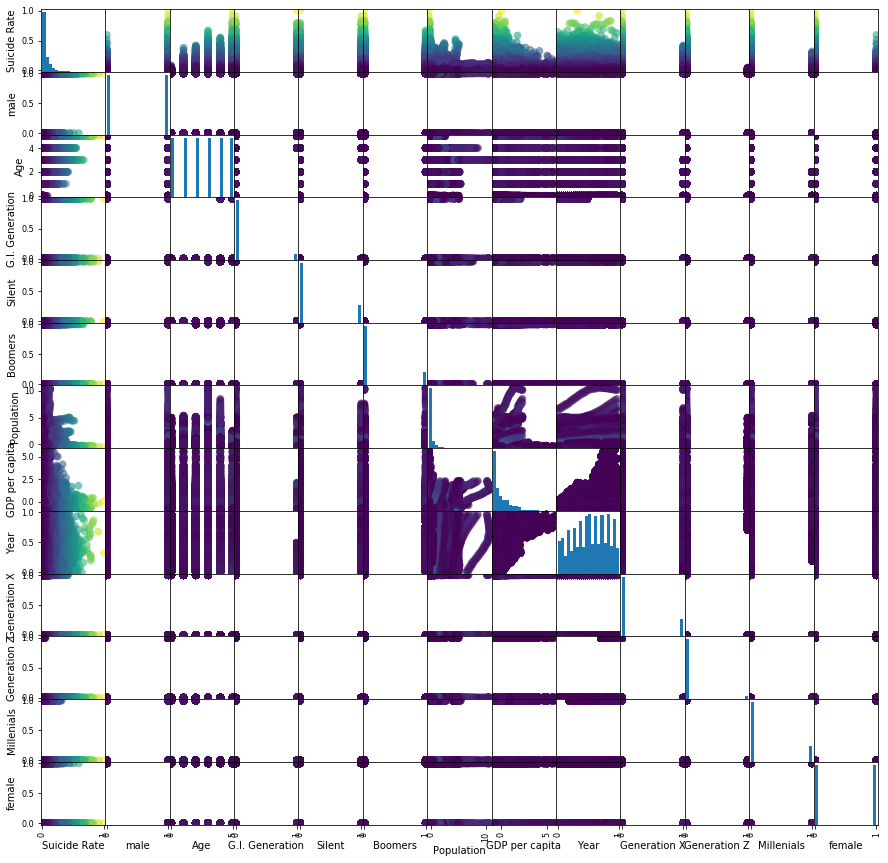

In [6]:
corrmat = df.iloc[:,101:].corr()

all_cols = corrmat.sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols

pd.plotting.scatter_matrix(df[cols],c = df['Suicide Rate'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.6)
#plt.savefig('',dpi=300)
plt.show()

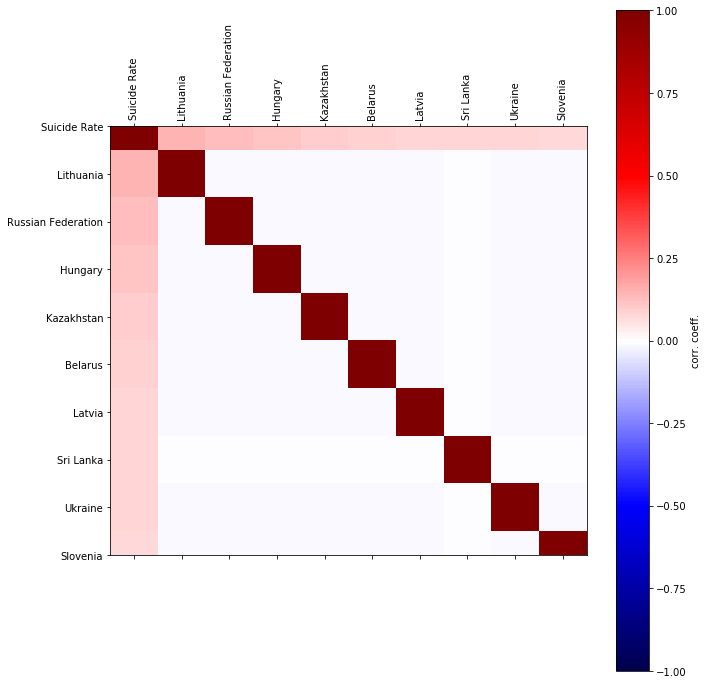

In [15]:
corrmat = df.iloc[:,:102].corr()
all_cols = np.abs(corrmat).sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols[:10]

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
#plt.savefig('',dpi=300)
plt.show()

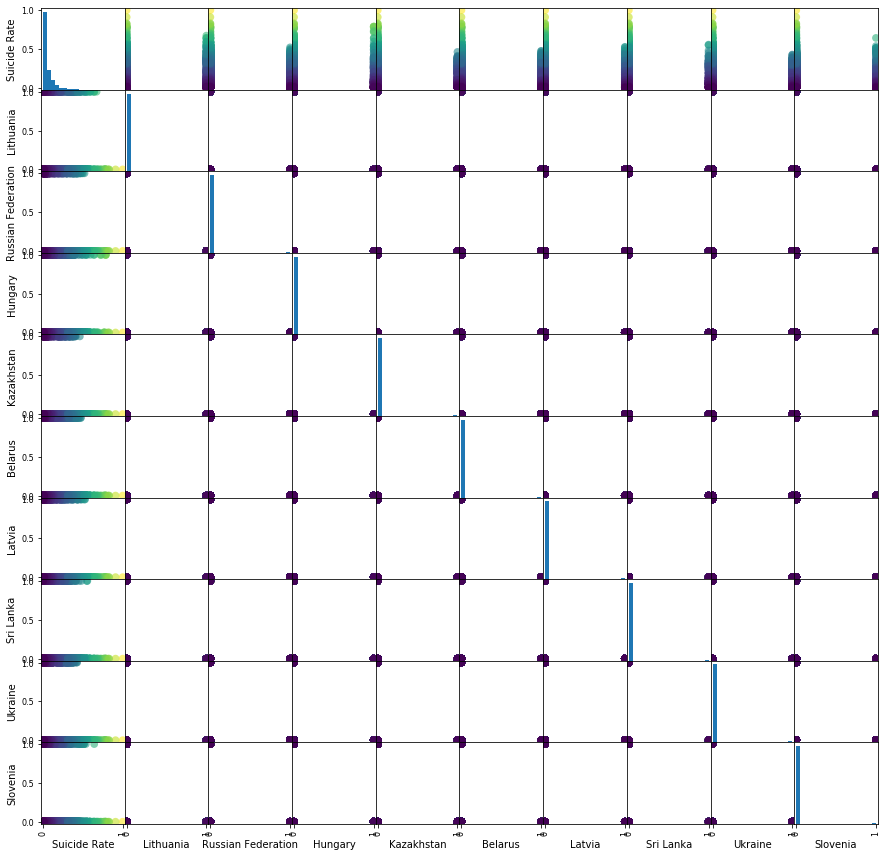

In [7]:
corrmat = df.iloc[:,:102].corr()


all_cols = corrmat.sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols[:10]

pd.plotting.scatter_matrix(df[cols],c = df['Suicide Rate'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.6)
#plt.savefig('',dpi=300)
plt.show()

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

In [9]:
y = df['Suicide Rate'].values
df.drop(columns=['Suicide Rate'],inplace=True)
X = df.values
feature_names = df.columns

In [10]:
mi = mutual_info_regression(X, y)
f_select_mi = SelectKBest(mutual_info_regression,k=10)
X_f_mi = f_select_mi.fit_transform(X,y)
feature_names[f_select_mi.get_support()]

Index(['Antigua and Barbuda', 'female', 'male', 'Boomers', 'Generation Z',
       'Millenials', 'Silent', 'Age', 'Population', 'GDP per capita'],
      dtype='object')

In [11]:
f_test, p_values = f_regression(X, y)
f_select = SelectKBest(f_regression,k=10)
X_f = f_select.fit_transform(X,y)
feature_names[f_select.get_support()]

Index(['Hungary', 'Lithuania', 'Russian Federation', 'female', 'male',
       'G.I. Generation', 'Generation Z', 'Millenials', 'Silent', 'Age'],
      dtype='object')

In [12]:
mi_feature = feature_names[f_select_mi.get_support()]
ftest_feature = feature_names[f_select.get_support()]
print(set(mi_feature) | set(ftest_feature))
len(set(mi_feature) | set(ftest_feature))

{'Antigua and Barbuda', 'Population', 'GDP per capita', 'Generation Z', 'Age', 'Silent', 'Russian Federation', 'female', 'Hungary', 'Boomers', 'Millenials', 'G.I. Generation', 'Lithuania', 'male'}


14

Top features correlated with Suicide Rate:
<br>
{Antigua and Barbuda, Population, GDP per capita, Generation Z, Age, Silent, Russian Federation, female, Hungary, Boomers, Millenials, G.I. Generation, Lithuania, male}

#### General Overviews

In [17]:
df = pd.read_csv('Suicide Rate Preprocessed.csv')

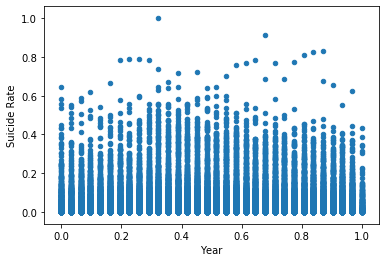

In [36]:
df.plot.scatter('Year','Suicide Rate')
plt.show()

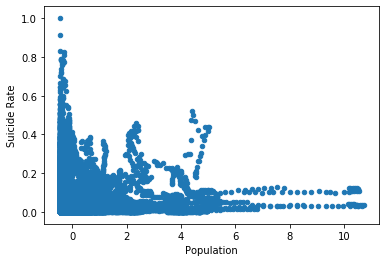

In [21]:
df.plot.scatter('Population','Suicide Rate')
plt.show()

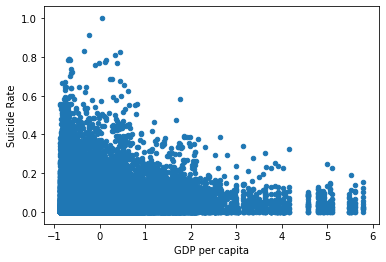

In [22]:
df.plot.scatter('GDP per capita','Suicide Rate')
plt.show()

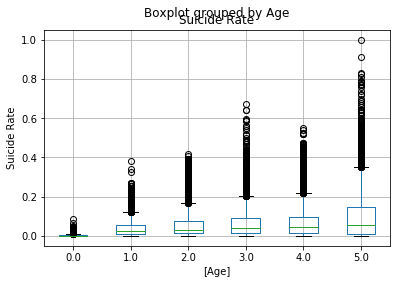

In [26]:
df[['Suicide Rate','Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate')
plt.show()

In [71]:
print(df.groupby(['Age']).mean()['Suicide Rate'])

Age
0.0    0.002756
1.0    0.039770
2.0    0.054171
3.0    0.066442
4.0    0.071812
5.0    0.106483
Name: Suicide Rate, dtype: float64


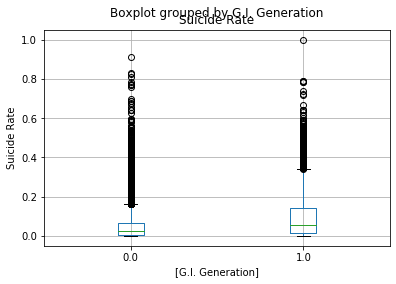

In [33]:
df[['Suicide Rate','G.I. Generation']].boxplot(by='G.I. Generation')
plt.ylabel('Suicide Rate')
plt.show()

In [63]:
print(df.groupby(['G.I. Generation']).mean()['Suicide Rate'])

G.I. Generation
0.0    0.051554
1.0    0.106443
Name: Suicide Rate, dtype: float64


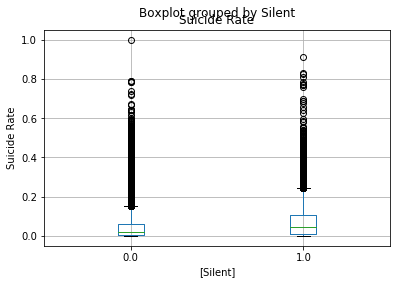

In [27]:
df[['Suicide Rate','Silent']].boxplot(by='Silent')
plt.ylabel('Suicide Rate')
plt.show()

In [64]:
print(df.groupby(['Silent']).mean()['Suicide Rate'])

Silent
0.0    0.049581
1.0    0.081872
Name: Suicide Rate, dtype: float64


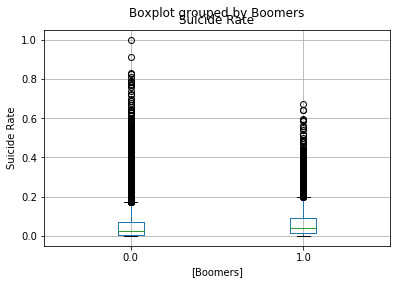

In [31]:
df[['Suicide Rate','Boomers']].boxplot(by='Boomers')
plt.ylabel('Suicide Rate')
plt.show()

In [65]:
print(df.groupby(['Boomers']).mean()['Suicide Rate'])

Boomers
0.0    0.055097
1.0    0.065529
Name: Suicide Rate, dtype: float64


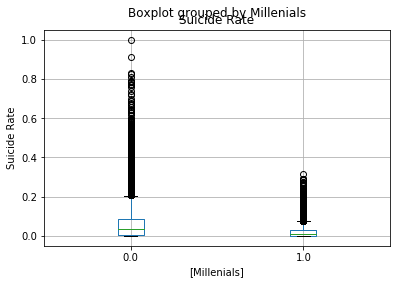

In [32]:
df[['Suicide Rate','Millenials']].boxplot(by='Millenials')
plt.ylabel('Suicide Rate')
plt.show()

In [66]:
print(df.groupby(['Millenials']).mean()['Suicide Rate'])

Millenials
0.0    0.065754
1.0    0.023930
Name: Suicide Rate, dtype: float64


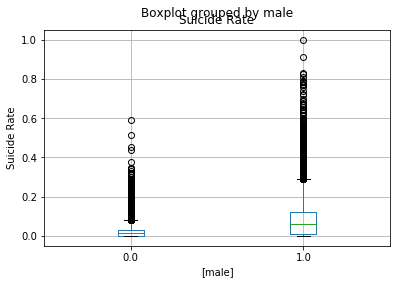

In [19]:
df[['Suicide Rate','male']].boxplot(by='male')
plt.ylabel('Suicide Rate')
plt.show()

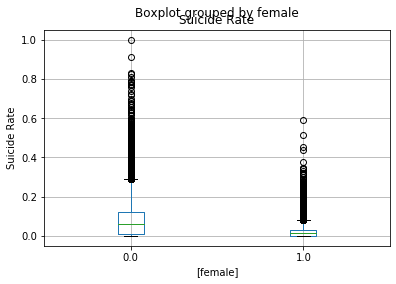

In [29]:
df[['Suicide Rate','female']].boxplot(by='female')
plt.ylabel('Suicide Rate')
plt.show()

In [52]:
print(df.groupby(['male']).mean()['Suicide Rate'])

male
0.0    0.023971
1.0    0.089965
Name: Suicide Rate, dtype: float64


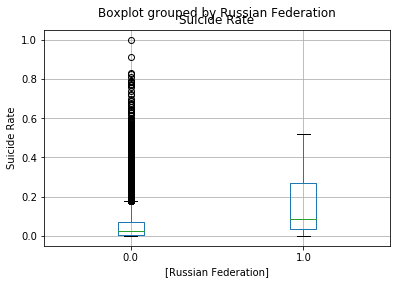

In [28]:
df[['Suicide Rate','Russian Federation']].boxplot(by='Russian Federation')
plt.ylabel('Suicide Rate')
plt.show()

In [55]:
print(df.groupby(['Russian Federation']).mean()['Suicide Rate'])

Russian Federation
0.0    0.055812
1.0    0.155098
Name: Suicide Rate, dtype: float64


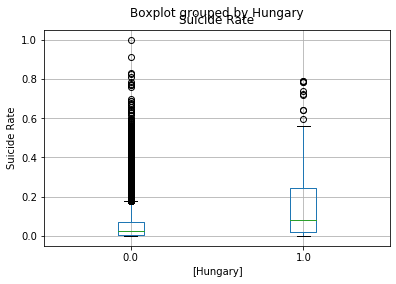

In [30]:
df[['Suicide Rate','Hungary']].boxplot(by='Hungary')
plt.ylabel('Suicide Rate')
plt.show()

In [56]:
print(df.groupby(['Hungary']).mean()['Suicide Rate'])

Hungary
0.0    0.055969
1.0    0.145626
Name: Suicide Rate, dtype: float64


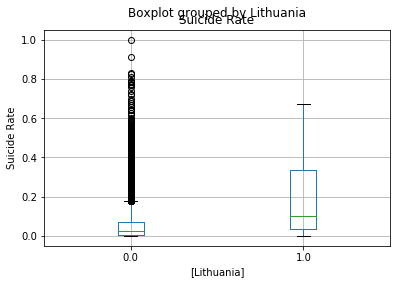

In [34]:
df[['Suicide Rate','Lithuania']].boxplot(by='Lithuania')
plt.ylabel('Suicide Rate')
plt.show()

In [57]:
print(df.groupby(['Lithuania']).mean()['Suicide Rate'])

Lithuania
0.0    0.055802
1.0    0.179649
Name: Suicide Rate, dtype: float64


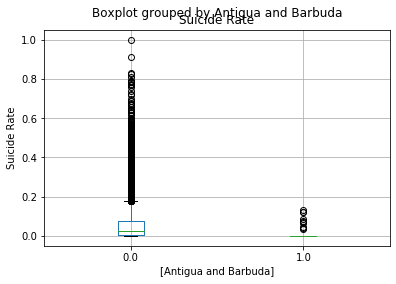

In [20]:
df[['Suicide Rate','Antigua and Barbuda']].boxplot(by='Antigua and Barbuda')
plt.ylabel('Suicide Rate')
plt.show()

In [58]:
print(df.groupby(['Antigua and Barbuda']).mean()['Suicide Rate'])

Antigua and Barbuda
0.0    0.057610
1.0    0.002458
Name: Suicide Rate, dtype: float64


#### Difference in Genders

Age

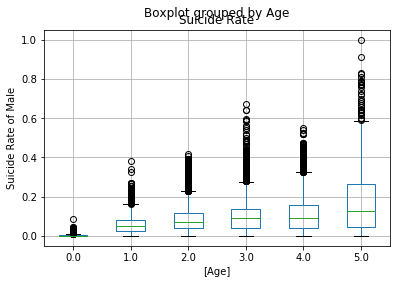

In [62]:
df[df['male'] == 1][['Suicide Rate', 'Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate of Male')
plt.show()

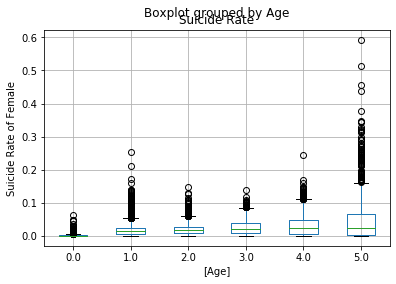

In [61]:
df[df['male'] == 0][['Suicide Rate', 'Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate of Female')
plt.show()

In [67]:
dfo = pd.read_csv('Suicide Rate.csv')